## Comparative analysis between Australian and United Kingdom headlines about the war in Ukraine using *The Guardian* API.

#### Data: [The Guardian OpenPlatform](https://open-platform.theguardian.com/access/)

<author> &copy; Prepared by Oscar Mendoza Cerna

In [40]:
# import libraries for this question here
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns            
sns.set()

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


### 1. Question

- The significance of knowing about how Australia and UK present their news about war in Ukraine, it can demonstrate the importance of each country about this horrible problem.
- It could even see the position of each government about the war and the affectation that it has about each country.
- Headlines may show recurrent topics throughout the period of war such as sequence of war, current state of war, economic issues.
- Due to this, important group of interest such as Governments, citizens, investor, travelers (tourism), journalist could be interested in the answer to this question because there will be pivotal to know the affectation of the war in each country.


### 2. Data

**Loading data**


In [41]:
#load key ↓↓↓↓↓↓↓↓↓↓
key = 'YOUR_API_HERE' 

# Access the data via API
baseUrl = 'https://content.guardianapis.com/search?q='
searchString = 'Ukraine'
production_office1 = "aus"
production_office2 = "uk"
fromDate = "2022-02-15" #It is regarded a date close to the beginning of the war
toDate = "2022-04-22" #last day of analysis

#url = baseUrl+'"'+searchString+'"'+'&production-office='+production_office1+'&from-date='+fromDate+'&api-key='+key
url_aus = baseUrl+'"'+searchString+'"'+'&production-office='+production_office1+'&from-date='+fromDate+'&to-date='+toDate+'&api-key='+key
url_uk = baseUrl+'"'+searchString+'"'+'&production-office='+production_office2+'&from-date='+fromDate+'&to-date='+toDate+'&api-key='+key
print("url_aus: " + url_aus[:100])
print("url_uk: " + url_uk[:100])


url_aus: https://content.guardianapis.com/search?q="Ukraine"&production-office=aus&from-date=2022-02-15&to-da
url_uk: https://content.guardianapis.com/search?q="Ukraine"&production-office=uk&from-date=2022-02-15&to-dat


**General information**


In [42]:
# Using this function, it is obtained general information in order to use that data to get NEWS 
def info_url(url):
    response = requests.get(url)
    data = json.loads(response.content)
    
    # Information:
    currentpages = data['response']['currentPage']
    page = data['response']['pages']
    pagesizes = data['response']['pageSize']
    
    # Keys
    key_data = data.keys()
    response_keys = data['response']
    responses = response_keys.keys()
    
    print("\tCurrent page: " + str(currentpages))
    print("\tTotal number of pages: " + str(page))
    print("\tNumber of result by pages: " + str(pagesizes))
    print("\tKeys in data: " + str(key_data))
    print("\tKeys in response: " + str(responses))


In [43]:
# Dispplay the information: It shows us information as total number of pages and number of result by pages.
# Therefore, if it is mulptiplied number of pages by results, it could be reached the number of news. 

print("General information Australia url:")
info_url(url_aus)
print("\nGeneral information UK url:")
info_url(url_uk)


General information Australia url:
	Current page: 1
	Total number of pages: 45
	Number of result by pages: 10
	Keys in data: dict_keys(['response'])
	Keys in response: dict_keys(['status', 'userTier', 'total', 'startIndex', 'pageSize', 'currentPage', 'pages', 'orderBy', 'results'])

General information UK url:
	Current page: 1
	Total number of pages: 276
	Number of result by pages: 10
	Keys in data: dict_keys(['response'])
	Keys in response: dict_keys(['status', 'userTier', 'total', 'startIndex', 'pageSize', 'currentPage', 'pages', 'orderBy', 'results'])


In order to have a proper number of heading for analysis, it will be selected approximately 500 heading. Therefore, because each page has around 10 heading, it will be needed 50 pages.

**Find News**

Using these codes, It is converted APIs into Json structure.
The variable "page" saves the number of pages, it is then used in a loop to obtain the total of news, which is download in a list.


In [44]:
# FIND AUSTRALIA NEWS
all_result_aus = []
response = requests.get(url_aus)
data = json.loads(response.content)
page = data['response']['pages']   # This code can be also used to obtain all headlines: page = data['response']['pages']
for i in range(1, (page+1)):
    url_final = str(url_aus) + "&page=" + str(i)
    response = requests.get(url_final)    
    data = json.loads(response.content)
    result = data['response']['results']
    all_result_aus.append(result)


In [45]:
# FIND UK INFORMATION NEWS
all_result_uk = []
response_uk = requests.get(url_uk)
data_uk = json.loads(response_uk.content)
page_uk = data_uk['response']['pages']  # This code can be also used  to obtain all headlines: page = data['response']['pages']
for i in range(1, (page_uk+1)):
    url_final = str(url_uk) + "&page=" + str(i)
    response_uk = requests.get(url_final)    
    data_uk = json.loads(response_uk.content)
    result_uk = data_uk['response']['results']
    all_result_uk.append(result_uk)


**Dataframe**

In order to handle easier the data, it is utilised the function "dataframe" to convert json structure into dataframe. Then, it is saved in each country variable.

In [46]:
#Function convert to DataFrame

def dataframe(all_result):
    df = pd.DataFrame(columns = ['Date','Type','Headline'])
    
    for result in all_result:
        for element in result:
            
            dates = element['webPublicationDate']
            dates1 = dates[0:10]
            
            types = element['type']
            titles = element['webTitle']
            
            dict_to_add = {'Date': dates1, 'Type': types, 'Headline': titles}
            df = df.append(dict_to_add, ignore_index=True)
            
    return df


In [47]:
# Save data in variable per country
df_au = dataframe(all_result_aus)
df_uk = dataframe(all_result_uk)


In [48]:
# Display output to see Ausytalia dataframe
df_au[:3]


,Date,Type,Headline
0,2022-04-20,article,Russian tycoon Oleg Tinkov denounces ‘insane w...
1,2022-02-24,article,Thursday briefing: Russia launches attack on U...
2,2022-04-16,liveblog,Germany announces military aid for Ukraine – a...


In [49]:
# Display output to see UK dataframe
df_uk[:3]


,Date,Type,Headline
0,2022-03-23,article,History’s debt to brave Ukraine journalists | ...
1,2022-03-17,article,Ukraine has exposed the west’s hypocrisy | Bri...
2,2022-03-20,article,The power of the new Ukraine


**Data transformation**

In [50]:
# sorting the data by 'date' and to assign correctly a index
def clean(df):
    
    df_sorted = df.sort_values(by=['Date'])
    data = df_sorted.set_index('Date')
    data.reset_index(inplace=True)
    
    return data


In [51]:
# Index and Sort data frame
df_au_sorted = clean(df_au)
df_uk_sorted = clean(df_uk)


In [52]:
# Number of Row and columns
print("Australia Dataset has: " + str(df_au_sorted.shape[0]) + " rows and " + str(df_au_sorted.shape[1]) + " columns")
print(' ')
df_au_sorted.head(3)


Australia Dataset has: 445 rows and 3 columns
 


,Date,Type,Headline
0,2022-02-15,article,Coalition tries to set up showdown with Labor ...
1,2022-02-15,liveblog,"Coronavirus live: UK records 41,648 new cases ..."
2,2022-02-15,article,Tuesday briefing: Ukraine – calls for diplomac...


In [53]:
print("UK Dataset has: " + str(df_uk_sorted.shape[0]) + " rows and " + str(df_uk_sorted.shape[1]) + " columns")
print(' ')
df_uk_sorted.head(3)


UK Dataset has: 2755 rows and 3 columns
 


,Date,Type,Headline
0,2022-02-15,article,Kyiv starts to breathe a little easier as Russ...
1,2022-02-15,article,Russia says it will withdraw some of its troop...
2,2022-02-15,article,No 10 pressured me to drop anti-money launderi...


### 3. Analysis

***How many types of news are there by country?***

In [54]:
# It can be obtained the type of news by country
new_type_aus = round(df_au_sorted['Type'].value_counts(normalize=True)*100,2)
new_type_uk = round(df_uk_sorted['Type'].value_counts(normalize=True)*100,2)

# Convert to Dataframe
new_type_aus = pd.DataFrame(new_type_aus)
new_type_uk = pd.DataFrame(new_type_uk)


In [55]:
# Distribution by %
new_type_aus


,Type
article,74.16
liveblog,25.84


In [56]:
# Distribution by %
new_type_uk


,Type
article,93.76
liveblog,6.13
interactive,0.11


***How many news by month?***

In [57]:
# split date by day, month, year
df_au_sorted[["year", "month", "day"]] = df_au_sorted["Date"].str.split("-", expand = True)
df_uk_sorted[["year", "month", "day"]] = df_uk_sorted["Date"].str.split("-", expand = True)


In [58]:
# Group by month and count the number of news (Australia)
df_au_by_month = df_au_sorted[['month','Type']].groupby('month', sort=True).count()
df_au_by_month = df_au_by_month.rename(columns={'Type':'count_aus'})
df_au_by_month

# Group by month and count the number of news (UK)
df_uk_by_month = df_uk_sorted[['month','Type']].groupby('month', sort=True).count()
df_uk_by_month = df_uk_by_month.rename(columns={'Type': 'count_uk'})

# Merge Aus and Uk News in one Dataframe
frames = [df_au_by_month, df_uk_by_month]
df_by_month = pd.concat(frames, axis=1)
df_by_month


,count_aus,count_uk
month,,
02,83,427
03,255,1632
04,107,696


**Statistic measurements**
***

In [59]:
# Add a column called Len_Heading to count the number of word used by heading
df_au_sorted['Len_Headline'] = df_au_sorted['Headline'].str.len()
df_uk_sorted['Len_Headline'] = df_uk_sorted['Headline'].str.len()


In [60]:
# See len_Heading in Australia news
df_au_sorted[:3]


,Date,Type,Headline,year,month,day,Len_Headline
0,2022-02-15,article,Coalition tries to set up showdown with Labor ...,2022,02,15,68
1,2022-02-15,liveblog,"Coronavirus live: UK records 41,648 new cases ...",2022,02,15,130
2,2022-02-15,article,Tuesday briefing: Ukraine – calls for diplomac...,2022,02,15,62


In [61]:
# see len_Heading in UK news
df_uk_sorted[:3]


,Date,Type,Headline,year,month,day,Len_Headline
0,2022-02-15,article,Kyiv starts to breathe a little easier as Russ...,2022,02,15,66
1,2022-02-15,article,Russia says it will withdraw some of its troop...,2022,02,15,81
2,2022-02-15,article,No 10 pressured me to drop anti-money launderi...,2022,02,15,75


In [62]:
# Calculate some statistics measurements

# mean of number of news per day
data_by_date_au = df_au_sorted[['Date','Type']].groupby('Date', sort=True).count()
data_by_date_uk = df_uk_sorted[['Date','Type']].groupby('Date', sort=True).count()

data_by_month_au = df_au_sorted[['month','Type']].groupby('month', sort=True).count()
data_by_month_uk = df_uk_sorted[['month','Type']].groupby('month', sort=True).count()

len_headline_aus = df_au_sorted['Len_Headline'].mean()
len_headline_uk = df_uk_sorted['Len_Headline'].mean()

max_headline_aus = df_au_sorted['Len_Headline'].max()
max_headline_uk = df_uk_sorted['Len_Headline'].max()

min_len_headline_aus = df_au_sorted['Len_Headline'].min()
min_len_headline_uk = df_uk_sorted['Len_Headline'].min()

print("STATISTICS: ") 
print("\nMean diary Australia news: " + str(round(data_by_date_au.mean()[0],2)) + " news")
print("Mean diary UK news: " + str(round(data_by_date_uk.mean()[0],2)) + " news")

print("\nMean month Australia news: " + str(round(data_by_month_au.mean()[0],2)) + " news")
print("Mean month UK news: " + str(round(data_by_month_uk.mean()[0],2)) + " news")

print("\nMean lenght of heading Australia news: " + str(round(len_headline_aus,2)) + " words")
print("Mean lenght of heading UK news: " + str(round(len_headline_uk,2)) + " words")

print("\nMax lenght of heading Australia news: " + str(round(max_headline_aus,2)) + " words")
print("Max lenght of heading UK news: " + str(round(max_headline_uk,2)) + " words")

print("\nMin lenght of heading Australia news: " + str(round(min_len_headline_aus,2)) + " words")
print("Min lenght of heading UK news: " + str(round(min_len_headline_uk,2)) + " words")
print("\n")


STATISTICS: 

Mean diary Australia news: 6.64 news
Mean diary UK news: 41.12 news

Mean month Australia news: 148.33 news
Mean month UK news: 918.33 news

Mean lenght of heading Australia news: 83.56 words
Mean lenght of heading UK news: 72.96 words

Max lenght of heading Australia news: 165 words
Max lenght of heading UK news: 136 words

Min lenght of heading Australia news: 37 words
Min lenght of heading UK news: 14 words




**Frequency of words**
***


**What is the total frequency of words by country?**

In [63]:
# This function return the total number of words in a list
def words_total(df):
    list1 = []
    for i in df['Headline']:
        list1.append(i)
    
    list2 = []
    for i in list1:
        list = i.split()
        list2.append(list)
        
    words = []
    for sublist in list2:
        for item in sublist:
            words.append(item)
    
    return words


In [64]:
# frequency function return a dataframe of the frequency of words
def frequency(list_words):
    frequency = pd.value_counts(np.array(list_words))
    df_words = pd.DataFrame(data=frequency)
    df_words.reset_index(inplace=True)
    df_words = df_words.rename(columns={"index": "Word", 0: "Frequency"})
    
    return df_words


In [65]:
# Use words_total function
words_au = words_total(df_au_sorted)
words_uk = words_total(df_uk_sorted)

# Use frequency function
freq_words_au = frequency(words_au)
freq_words_uk = frequency(words_uk)

freq_words_au[:5]


,Word,Frequency
0,as,176
1,to,174
2,of,133
3,it,123
4,–,115


In [66]:
# it is included the Len_word column to count the number of character by word
freq_words_au['Len_word'] = freq_words_au['Word'].str.len()
freq_words_uk['Len_word'] = freq_words_uk['Word'].str.len()


In [67]:
# It has been filtered the frequency over two digits (>=10 appearances) and Len_word > 2. Therefore, pronouns, articles and other irrelevant word is not considered in the analysis. 
df_words_freq_au = freq_words_au.loc[(freq_words_au["Frequency"] >  0) & (freq_words_au["Len_word"] > 2)]
df_words_freq_uk = freq_words_uk.loc[(freq_words_uk["Frequency"] >  0) & (freq_words_uk["Len_word"] > 2)]


In [68]:
# Showing top 50 word frequency (Australia)
df_words_freq_au_top50 = df_words_freq_au[:50]
df_words_freq_au_top50


,Word,Frequency,Len_word
5,happened,110,8
6,Ukraine,90,7
9,the,69,3
10,and,67,3
11,for,65,3
12,says,57,4
13,Russia,52,6
14,Russian,51,7
15,briefing:,43,9
16,Morning,42,7


In [69]:
# Showing top 50 word frequency (UK)
df_words_freq_uk_top50 = df_words_freq_uk[:50]
df_words_freq_uk_top50


,Word,Frequency,Len_word
3,the,579,3
4,Ukraine,533,7
5,and,497,3
9,for,388,3
11,Russian,339,7
14,Russia,275,6
17,The,218,3
18,war,198,3
19,says,185,4
20,happened,167,8


In [70]:
# Displaying the top 50 of word frequency of both countries, it can be seen some not useful words. Therefore, it will be deleted to obtain meaningful words
# Also, it will drop repeated or derived words such as Russia or Russian.
words_drop = ['the','and','for','says','with','from','over','are','after','what','more','The','about','will','has','but','not','have','how','more',
             'out','who','new','could','its','this','that','against','briefing:','mail:','Morning','know','day','review','view','happened','Guardian',
             'Editorial','obituary','can','could', 'Russian','war:','Russia-Ukraine','Russia’s','Australian','Australia’s','Ukrainian','Boris','Ukraine’s','Scott','Putin’s']


In [71]:
# After dropping some words, It will be selected the top20 words
df_freq_aus=df_words_freq_au_top50.query("Word != @words_drop")
df_freq_uk=df_words_freq_uk_top50.query("Word != @words_drop")


In [72]:
# Top20 words Australia News
df_words_freq_au_top20 = df_freq_aus[:20]
df_words_freq_au_top20


,Word,Frequency,Len_word
6,Ukraine,90,7
13,Russia,52,6
18,invasion,39,8
19,Australia,35,9
20,Morrison,33,8
22,Zelenskiy,31,9
23,war,31,3
24,Covid,31,5
34,Putin,24,5
37,China,21,5


In [73]:
# Top20 words UK News
df_words_freq_uk_top20 = df_freq_uk[:20]
df_words_freq_uk_top20


,Word,Frequency,Len_word
4,Ukraine,533,7
14,Russia,275,6
18,war,198,3
22,Putin,141,5
28,Johnson,120,7
33,invasion,103,8
35,sanctions,88,9
39,refugees,75,8
51,crisis,57,6
57,Kyiv,55,4


In [74]:
# Add a column percentage of frequency of the top 20 words (Australia)
word_sum = df_words_freq_au_top20['Frequency'].sum()
df_words_freq_au_top20['%Freq'] = (round(df_words_freq_au_top20['Frequency'] / word_sum,2))
df_words_freq_au_top20


,Word,Frequency,Len_word,%Freq
6,Ukraine,90,7,0.17
13,Russia,52,6,0.10
18,invasion,39,8,0.07
19,Australia,35,9,0.06
20,Morrison,33,8,0.06
22,Zelenskiy,31,9,0.06
23,war,31,3,0.06
24,Covid,31,5,0.06
34,Putin,24,5,0.04
37,China,21,5,0.04


In [75]:
# Add a column percentage of frequency of the top 20 words (UK)
word_sum = df_words_freq_uk_top20['Frequency'].sum()
df_words_freq_uk_top20['%Freq'] = round(df_words_freq_uk_top20['Frequency'] / word_sum,2)
df_words_freq_uk_top20


,Word,Frequency,Len_word,%Freq
4,Ukraine,533,7,0.28
14,Russia,275,6,0.14
18,war,198,3,0.10
22,Putin,141,5,0.07
28,Johnson,120,7,0.06
33,invasion,103,8,0.05
35,sanctions,88,9,0.05
39,refugees,75,8,0.04
51,crisis,57,6,0.03
57,Kyiv,55,4,0.03


**What are the similar words used by Australia and UK news?**

In [76]:
# Join similar words between Australia and UK (Top20 words)
merge_words = pd.merge(df_words_freq_au_top20, df_words_freq_uk_top20, on='Word')
merge_words = merge_words[:6]
merge_words

,Word,Frequency_x,Len_word_x,%Freq_x,Frequency_y,Len_word_y,%Freq_y
0,Ukraine,90,7,0.17,533,7,0.28
1,Russia,52,6,0.10,275,6,0.14
2,invasion,39,8,0.07,103,8,0.05
3,war,31,3,0.06,198,3,0.10
4,Putin,24,5,0.04,141,5,0.07
5,sanctions,21,9,0.04,88,9,0.05


**What is the % similarity of top 20 words?**

In [77]:
# The function 'words' return the total number of words in headings
def words(df):
    list1 = []
    for i in df['Word']:
        list1.append(i)
        
    return list1


In [78]:
# save total words by counytry
words_au = words(df_words_freq_au_top20)
words_uk = words(df_words_freq_uk_top20)


In [79]:
# Similarity: Jaccard coefficient (%)
# Jaccard coefficient measures the similiraty of words between documents transforming words into binary (0,1).

def Jaccard(list1, list2):
    d1_words = list1
    d2_words = list2
    
    # Calculate the vocabulary # 1
    d1_voc = set()
    for d1_word in d1_words:
        d1_voc.add(d1_word)
        
    # Calculate the vocabulary # 2
    d2_voc = set()
    for d2_word in d2_words:
        d2_voc.add(d2_word)
        
    # Vocabulary total
    V = d1_voc.union(d2_voc)
    
    # Binary # 1
    d1_bin = [];
    for item in V:
        if item in d1_voc:
            d1_bin.append(1)
        else:
            d1_bin.append(0)
            
    # Binary # 2
    d2_bin = [];
    for item in V:
        if item in d2_voc:
            d2_bin.append(1)
        else:
            d2_bin.append(0)
            
    # Jaccard coefficient
    d1andd2 = 0
    lenv = len(V)
    for i in range(lenv):
        if d1_bin[i] == d2_bin[i]:
            d1andd2 = d1andd2+1
    #print('|d1 AND d2| = ', d1andd2)
    
    d1ord2 = 0
    lenv = len(V)
    for i in range(lenv):
        if d1_bin[i] or d2_bin[i] == 1:
            d1ord2 = d1ord2+1
    #print('|d1 OR d2| = ', d1ord2)
    
    JC = round((d1andd2/d1ord2)*100,2)
    
    return JC
    #print('The Jaccard coefficient between Australia news and UK news = ' + str(round(JC*100,2)) + "%")


In [80]:
# Average of word similarity
print("Average of word similarity using Jaccard coefficient between Australia news and UK news = " + str(round(Jaccard(words_au, words_uk),2))+ "%")


Average of word similarity using Jaccard coefficient between Australia news and UK news = 20.69%


### 4. Visualisation

**Plot: Distribution of types of news**

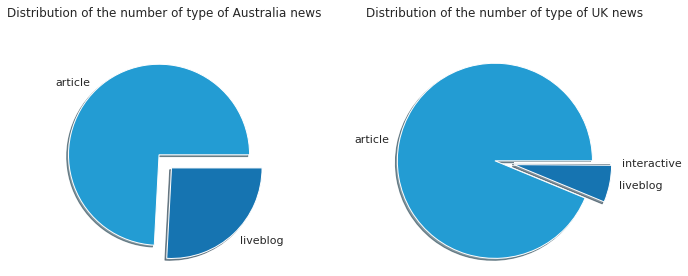

In [81]:
# We need 1D to draw a pie plot
flat_list_aus = [item for sublist in new_type_aus.values for item in sublist]
flat_list_uk = [item for sublist in new_type_uk.values for item in sublist]

# Pie types of news
new_type_aus
new_type_uk

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].pie(flat_list_aus,
        labels=new_type_aus.index,
        shadow=True,
        colors = ['#239cd3','#1674b1'],
        explode=[0.1,0.1]) # to separate the "slices"
axes[0].set_title('Distribution of the number of type of Australia news\n\n')
axes[0].axis("equal")

axes[1].pie(flat_list_uk,
        labels=new_type_uk.index,
        shadow=True,
        colors = ['#239cd3','#1674b1','#1674b1'],
        explode=[0.1,0.1,0.1]) # to separate the "slices"
axes[1].set_title('Distribution of the number of type of UK news\n\n')
axes[1].axis("equal")

fig.tight_layout()

**Plot: Number of news by country**

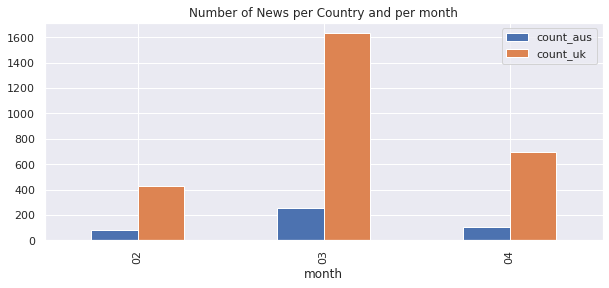

In [82]:
df_by_month.plot(kind="bar", figsize=(10,4), title="Number of News per Country and per month")
plt.show()


**Plot: Percentage of frequency of words by country**

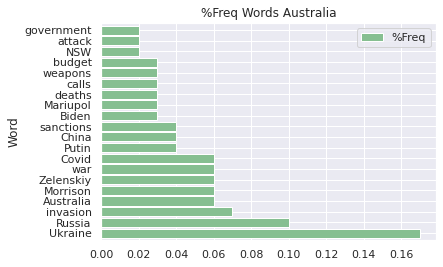

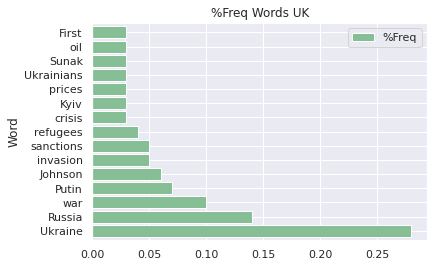

In [83]:
df_words_freq_au_top20.plot.barh(x='Word', y='%Freq', title='%Freq Words Australia', color='#86bf91',zorder=2, width=0.85)
df_words_freq_uk_top20.plot.barh(x='Word', y='%Freq', title='%Freq Words UK', color='#86bf95',zorder=2, width=0.85)
plt.show()


**Plot: Similarity of words**

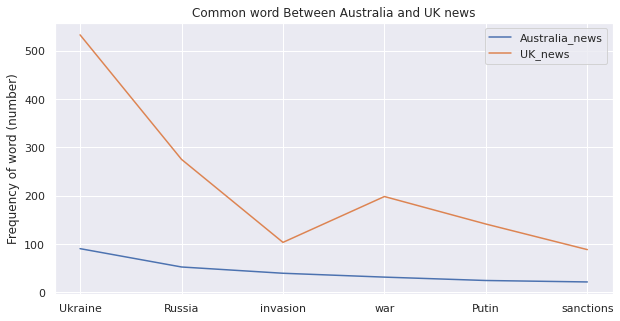

In [84]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

x = []
for i in merge_words['Word']:
    x.append(i)

plt.plot(x,merge_words["Frequency_x"], label='Australia_news' )
plt.plot(merge_words["Frequency_y"], label='UK_news')
plt.ylabel('Frequency of word (number)')
plt.title('Common word Between Australia and UK news')
plt.legend()
plt.show()


### 5. Insights

**Question: What can we learn about differences and similarities between the news presented to Australia and the UK?**

**Insights from the analysis**

- Uk publishes more news than Australia. Wile Australia has a mean of 148 news per month, Uk has a mean 918 news per month.

- There are two predominant types of news in Australia and UK: article and liveblog. Article is more frequent used by both countries; however, Australia tends to use a higher number of liveblog than UK. It might mean Australia news about the war are covered in real-time 24-hour per 7 days. Therefore, it is helpful for many journalists around world have a source of publishing 24/7 from Australia in order to up to date their own information. Also, citizens may be informed in every time when they need to.

- There are six common words between Australia and UK news: 'Ukraine', 'Russia', 'invasion', 'war', 'Sanctions', 'Putin'. The five-first words are as prevalent in Australia as they are in the Uk, but the 'Putin' word differ in the frequency. Whereas UK has the 'Putin' word in 4th position, Australia has it in 9th position. However, Australia news presents a high frequency of the Ukranian president. Hence, it could be concluded that while Australia news are more interested in informing comments or expressions from the Ukranian president, Uk news are interesting in the expressions of Russian president.

- The Australia and Uk presidents also have a high frequency in news. It looks like it is frequent the pronouncement of both governates, which can be interpreted that both countries are constantly participating about the war.

- Another noticeable insight is the 'price' word in UK news. It can be assumed that due to the war, some products are increasing the prices. However, Australia do not mention this kind of word, but it can be seen words as 'Labor', 'Budget' and 'China' which could be supposed to have relevance to issues about business and employment. This type of information can be relevant to employers, consumers and investor.

- Australia news presents a high frequency of the word 'Covid'. It could be inferred that the covid cases is increasing in Ukraine because they are worried about the war instead of the virus. This information is useful to the World Health Organization.

- While Uk news show commonly the word 'refugees' which can be indicate Ukrainians is looking to stay safety, Australia news publishes the deaths due to the war.
